In [1]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ecfc841e99b3a2c99de95c4bc7b422bcf1eac1b13011a67617dc23685a4d273f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
!unzip /content/predykcja-analiza-cen-aut.zip

Archive:  /content/predykcja-analiza-cen-aut.zip
  inflating: sales_ads_test.csv      
  inflating: sales_ads_train.csv     
  inflating: sample_submission.csv   
  inflating: synthetic_training_data_mostlyai_pl.csv  
  inflating: synthetic_training_data_sdv_pl.csv  


In [4]:
df = pd.read_csv("/content/sales_ads_train.csv",index_col=0)

Do przeprowadzenia EDA wykorzystujemy wizualizację z biblioteki ydata_profiling

In [5]:
ProfileReport(df, title="Dataset Profile Report",minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:27<00:00,  1.15s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Wnioski

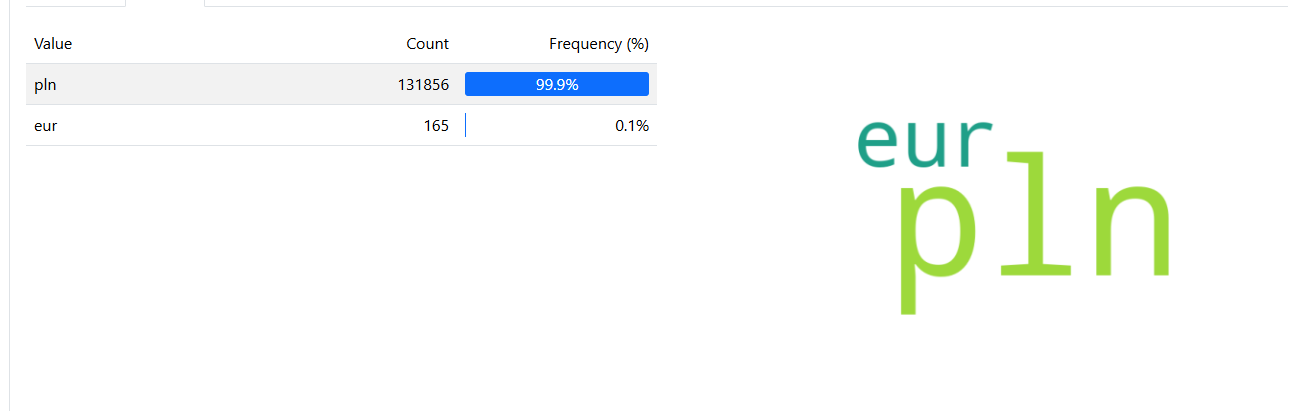

W datasecie zawierają się ceny w różnych walutach jest to zmienna, którą chcemy przewidywać dlatego powinna zostać uspójniona do jednej waluty czyli PLN

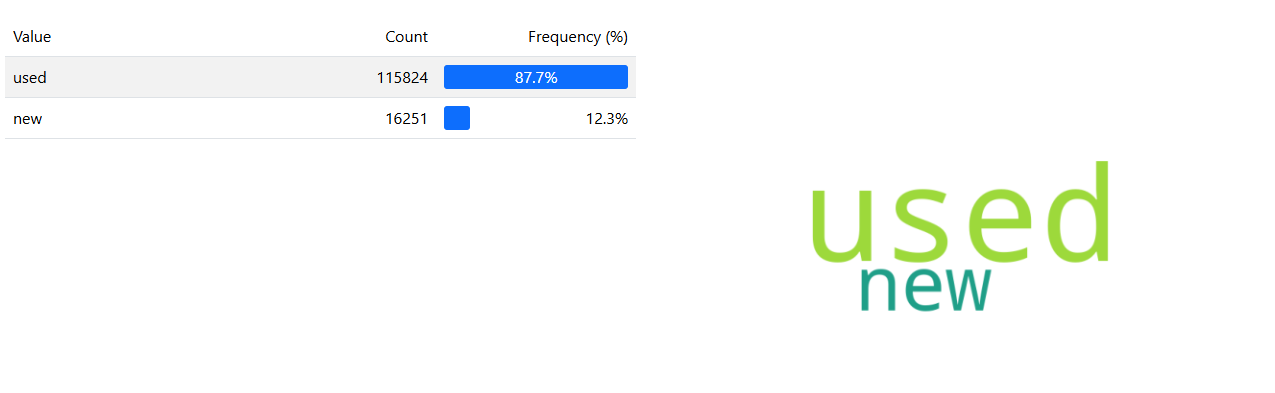

w datasecie zawierają się samochody używane oraz nowe pod względem modelowania możliwe, że warto by było rozdzielić te frakcję na dwa różne modele

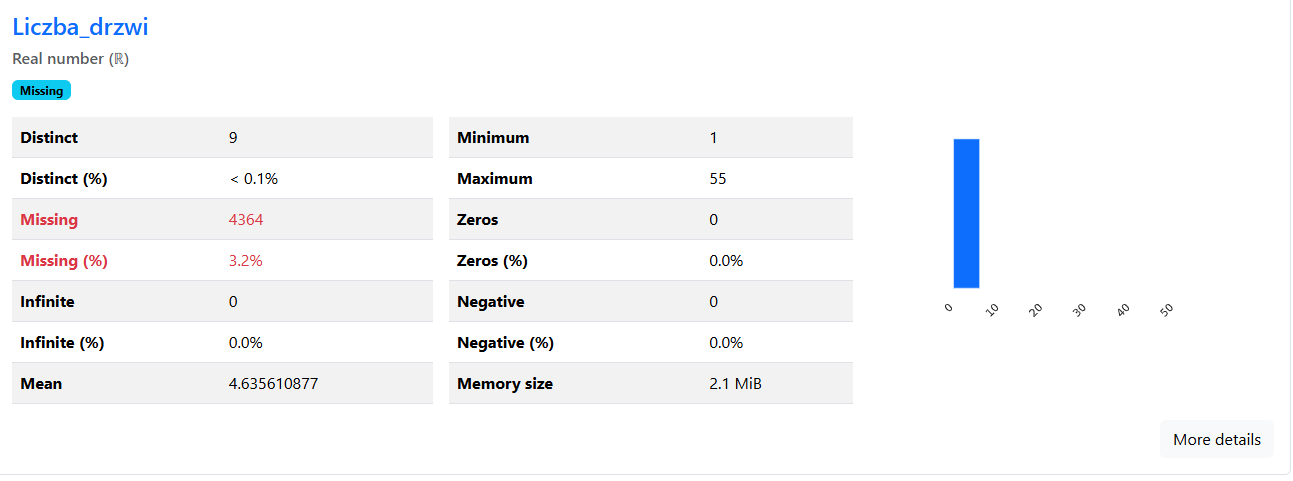

Liczba drzwi przyjmuje dziwne wartości wiersze, które powinny zostać usunięte lub zastąpione

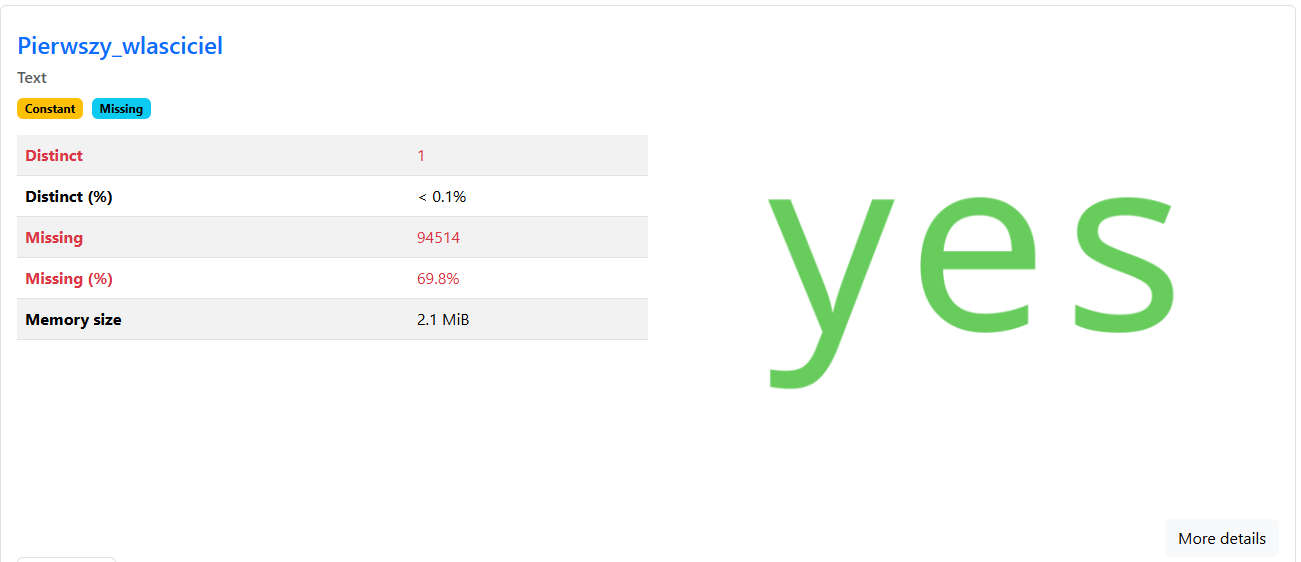

W kolumnie 70% wartości stanowi null, który oznacza że nie jest to pierwszy właściciel samochodu, nulle będzie trzeba zastąpić wartością stałą

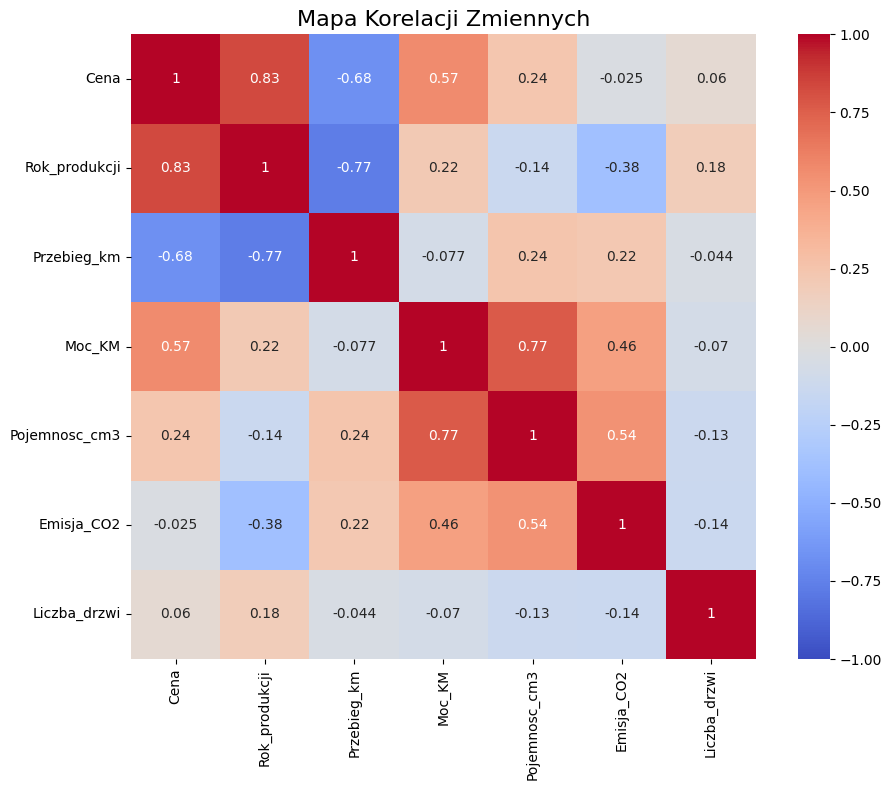

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.select_dtypes(include=["int","float"]).corr(method="spearman")

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True)
plt.title('Mapa Korelacji Zmiennych', fontsize=16)
plt.tight_layout()
plt.show()


Z Ceną silnie skorelowany jest Rok_Produkcji, Przebieg oraz Moc